In [1]:
import tensorflow as tf
import numpy as np
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("default") # Change the filter in this process
    os.environ["PYTHONWARNINGS"] = "default" # Also affect subprocesses

2023-06-13 23:09:49.960254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 23:09:50.039527: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 23:09:50.039545: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-13 23:09:50.509715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:

celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fagrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fagrenhet
-10.0 degrees Celsius = 14.0 degrees Fagrenhet
0.0 degrees Celsius = 32.0 degrees Fagrenhet
8.0 degrees Celsius = 46.0 degrees Fagrenhet
15.0 degrees Celsius = 59.0 degrees Fagrenhet
22.0 degrees Celsius = 72.0 degrees Fagrenhet
38.0 degrees Celsius = 100.0 degrees Fagrenhet


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

2023-06-13 23:09:53.760956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 23:09:53.761120: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 23:09:53.761171: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-13 23:09:53.761215: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-13 23:09:53.761257: W tensorflow/c

In [4]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(0.1))

In [5]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose = 0)
print("Finished training the model")

Finished training the model


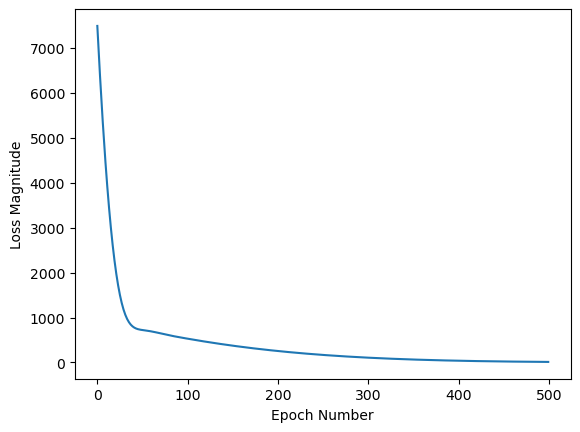

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [7]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 49ms/step
[[211.2814]]


In [8]:
print("There are the layer variables: {}".format(l0.get_weights()))

There are the layer variables: [array([[1.8282976]], dtype=float32), array([28.451643], dtype=float32)]


In [9]:
l0 = tf.keras.layers.Dense(units = 4, input_shape=[1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q,fahrenheit_a, epochs=500,verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model Predict that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("There are the l1 variables: {}".format(l1.get_weights()))
print("There are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 41ms/step
[[211.74744]]
1/1 [==============================] - 0s 22ms/step
Model Predict that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.10156602,  0.22767232, -0.9636591 ,  0.5392188 ]],
      dtype=float32), array([-2.0959868,  3.3156264, -3.835918 , -1.6023682], dtype=float32)]
There are the l1 variables: [array([[-0.55151075,  0.40945753,  0.5958422 , -0.6893254 ],
       [ 0.33141539, -1.2937102 ,  0.7189114 ,  0.07659095],
       [-0.93009233,  0.42675275,  0.3980838 ,  1.282873  ],
       [-1.0128683 ,  0.01717397,  0.36371216,  0.8502247 ]],
      dtype=float32), array([ 3.4102275, -3.735608 ,  0.7977749, -2.5996122], dtype=float32)]
There are the l2 variables: [array([[ 0.9128195 ],
       [-1.4831381 ],
       [ 0.16382124],
       [-0.4018651 ]], dtype=float32), array([3.5412788], dtype=float32)]


In [10]:
pwd

'/run/media/carlos/ea8ff4ea-c5fd-4b9d-bf66-15507c1d2037/Documentos/Banco_de_dados/Codes/04_HousePrices'

In [13]:
!git remote add origin https://github.com/CarlosHenriqueMatos/Udacity.git

fatal: not a git repository (or any parent up to mount point /run/media/carlos)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [16]:
!git --help

usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--config-env=<name>=<envvar>] <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find the commit that introduced 